This is a notebook with a standardised script that reads Survey Data and produces Institutional Informal Rules

This analysis requires two csv files:
1. Survey overview file with the following content: 

	Columns: 
	- Question identifier (“Question_ID”)
	- Question text (“Question_Text”)
	- Response option text (“Response_Option”)
	- Response option numerical mapping (“Response_Value”)
	- What ADICO Component this question identifies (Attibute, Aim, Condition, Deontic) (“ADICO_Category”)

	Rows: 
	- a row for each response option. 
	- if a question can be answered with any integer between one and five then that question takes up five rows.

2. Survey Responses file with the following content

	Columns: 
	- the questions identified by their matching "Question_ID"

	Rows: 
	- the responses identified by a "Response_ID" 
	


In [1]:
#Import Required Packages for the process
import pandas as pd

Loading the Survey Data:

In [2]:
#Change these locations to your Overview and Responses csv files:
Survey_Overview_Location = "..\Generate mock survey\Mock_Survey_Overview.csv"
Survey_Responses_Location = "..\Generate mock survey\mock_survey_responses.csv"

#Reads the files into a table
Survey_Overview = pd.read_csv(Survey_Overview_Location)
Survey_Responses = pd.read_csv(Survey_Responses_Location).set_index('Response_ID')

#creates a unique id value for each response option
Survey_Overview["Question_Response_ID"] = Survey_Overview["Question_ID"].astype(str) + "_" + Survey_Overview["Response_Value"].astype(str)
Survey_Overview.set_index('Question_Response_ID', inplace=True)

In [3]:
# You can run this if you have run everything previously and have saved a completed overview file
Completed_Overview_Location = "Mocksurvey_completed_overview.csv" #change the name to the name of the file

try:
    #Reads the files into a table
    adjusted_overview = pd.read_csv(Completed_Overview_Location).set_index('Question_Response_ID')
    #This way this file can be loaded and various steps of adding columns to the overview can be skipped
    display(adjusted_overview)
except:
    print("The requested completed overview file does not exist or can not be found. If you know you have saved it before, please verify the name and location")

,Question_ID,Question_Text,Response_Option,Response_Value,ADICO_Category,IG_Component
Question_Response_ID,,,,,,
Q1_1,Q1,What is your age?,Under 18,1,Attribute,if they are under 18
Q1_2,Q1,What is your age?,18-35,2,Attribute,if they are between 18 and 35
Q1_3,Q1,What is your age?,50 or younger,3,Attribute,if they are 50 or younger
Q1_4,Q1,What is your age?,Over 50,4,Attribute,if they are over 50
Q1_5,Q1,What is your age?,Over 65,5,Attribute,if they are over 65
Q2_1,Q2,What is your gender?,Male,1,Attribute,if they are male
Q2_2,Q2,What is your gender?,Female,2,Attribute,if they are female
Q2_3,Q2,What is your gender?,Other,3,Attribute,if they are other
Q3_1,Q3,Have you recycled in the past month?,Yes,1,Aim,recycle


In [4]:
display(Survey_Overview)

,Question_ID,Question_Text,Response_Option,Response_Value,ADICO_Category
Question_Response_ID,,,,,
Q1_1,Q1,What is your age?,Under 18,1,Attribute
Q1_2,Q1,What is your age?,18-35,2,Attribute
Q1_3,Q1,What is your age?,36-50,3,Attribute
Q1_4,Q1,What is your age?,51-65,4,Attribute
Q1_5,Q1,What is your age?,Over 65,5,Attribute
Q2_1,Q2,What is your gender?,Male,1,Attribute
Q2_2,Q2,What is your gender?,Female,2,Attribute
Q2_3,Q2,What is your gender?,Other,3,Attribute
Q3_1,Q3,Have you recycled in the past month?,Yes,1,Aim


In [5]:
display(Survey_Responses)

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10
Response_ID,,,,,,,,,,
1,5,3,2,2,2,1,2,1,2,1
2,3,1,1,1,1,1,4,2,1,1
3,1,3,1,2,1,1,1,2,1,1
4,1,1,2,2,1,2,4,1,1,2
5,4,1,2,2,2,1,1,2,2,1
...,...,...,...,...,...,...,...,...,...,...
96,1,3,1,1,1,2,2,2,2,1
97,1,3,2,1,2,1,5,2,2,2
98,1,2,1,2,2,2,1,2,2,2


Categorising and Selecting Questions 

In [6]:
try: #Make lists of questions that have been categorized into each ADICO component:
    attributes = Survey_Overview[Survey_Overview['ADICO_Category'] == "Attribute"]["Question_ID"].unique()
    aims = Survey_Overview[Survey_Overview['ADICO_Category'] == "Aim"]["Question_ID"].unique()
    conditions  = Survey_Overview[Survey_Overview['ADICO_Category'] == "Condition"]["Question_ID"].unique()
    deontics = Survey_Overview[Survey_Overview['ADICO_Category'] == "Deontic"]["Question_ID"].unique()
except Exception as e: print(e) #This won't work if you don't have the 'ADICO_Category' column


#Alternatively you can make manual lists of the questions if you wish to select a subset or if the questions have not been categorised with ADICO_Category:
aims = ['Q3', 'Q4', 'Q5']
conditions = ['Q1', 'Q2', 'Q6', 'Q7', 'Q8'] #Added attribute questions to conditions
deontics = ['Q9', 'Q10']

Preprocessing and Codifying responses:

In [7]:
adjusted_responses = Survey_Responses.copy().dropna(axis=1)

#Prepare responses to be binary outcomes
adjusted_responses.loc[adjusted_responses["Q1"] >= 4, "Q1"] = 4 #sets all responses of age over 50 to 4
adjusted_responses.loc[adjusted_responses["Q1"] <= 3, "Q1"] = 3 #sets all responses of age under 50 to 3

adjusted_responses.loc[adjusted_responses["Q7"] >= 4, "Q7"] = 4 #sets all responses that consider public transport price expensive to 4
adjusted_responses.loc[adjusted_responses["Q7"] <= 3, "Q7"] = 3 #sets all responses that do not consider public transport price expensive to 3

#Remove responses that might not be relevant: 
#Note: this is just an example on how to filter for a subset of the responses, ignoring "other" as a gender may be ethically problematic and misrepresent true patterns of behaviour
adjusted_responses = adjusted_responses[adjusted_responses["Q2"] != 3] #This removes all "other" responses to the question on gender

In [51]:
#You should skip this step if you have loaded an adjusted and completed overview file

adjusted_overview = Survey_Overview.copy().dropna(axis=1)

#Prepare responses to be binary outcomes
adjusted_overview.loc[(adjusted_overview["Question_ID"] == "Q1") & (adjusted_overview["Response_Value"] == 4), "Response_Option"] = "Over 50" #changes the text of the response for age option 4 to "Over 50"  
adjusted_overview.loc[(adjusted_overview["Question_ID"] == "Q1") & (adjusted_overview["Response_Value"] == 3), "Response_Option"] = "50 or younger" #changes the text of the response for age option 3 to "50 or younger"

adjusted_overview.loc[(adjusted_overview["Question_ID"] == "Q7") & (adjusted_overview["Response_Value"] == 4), "Response_Option"] = "Expensive" #changes the text of the response for price perception option 4 to "Expensive"  
adjusted_overview.loc[(adjusted_overview["Question_ID"] == "Q7") & (adjusted_overview["Response_Value"] == 3), "Response_Option"] = "Not expensive" #changes the text of the response for price perception option 3 to "not Expensive" 

#If it doesn't exist yet, create a column in overview which should eventually contain the question and response rewritten in ADICO syntax
try: adjusted_overview["IG_Component"]
except: adjusted_overview["IG_Component"] = adjusted_overview["Question_Text"] +" Response: " + adjusted_overview["Response_Option"]

Skip this section if you already loaded an adjusted and completed overview file

Rewriting responses as their respective Adico component (Optional: Could do this manually using excel or google sheets if there are not many questions)

In [9]:
from langchain_core.prompts import ChatPromptTemplate
from langchain_groq import ChatGroq
import json
import sys
# Add the parent directory to the path
sys.path.append('..')
# Now you can import the private values defined in config
from config import groqkey #API keys should always be kept in a separate config file that you never share
#Currently you can request an API from Groq and make api calls for free!

In [10]:
#Ask Generative AI to rewrite the Json Approach
#groq offers these models:
models = ["gemma-7b-it", "llama3-8b-8192", "mixtral-8x7b-32768", "llama3-70b-8192"]
# Define the LLM, models[1] represents "llama3-8b-8192"
llm = ChatGroq(temperature=0, model=models[1], api_key=groqkey)

#if you prefer to use openAI (requires paid API access):
# models = ["gpt-3.5-turbo-0125", "gpt-4o"]
# llm = ChatOpenAI(temperature=0, model=models[1], api_key=OPENAI_Key)

#You can experiment with the system instructions given to the ai, this section was excluded because I considered it redundant but it can always be added
"""Here is an example: "Attribute": "People", "Aim":"do this specific action", "Condition1": "if this condition is met", "Condition2": "and this condition is met" 
 I should be able to combine any output Attribute + Aim + Condition to form a full 3rd-person sentence that describes behaviour. """

#Function that gets the response from the LLM model and reads it into a table, the function takes a dataframe table of the survey overview, 
# preferably provide it with a subset of the survey overview of Aims, Conditions or Attributes and indicate this in the ADICO_component value.
def ExampleCompletionFunction(questions, ADICO_component):
    #create an empty table with the output column:
    IG_components = pd.DataFrame(columns=["IG_Component"])
    
    #Handle each question separately to avoid confusion:
    for question in questions['Question_ID'].unique():

        # Prepares the provided overview table for the LLM 
        questionset = questions[questions['Question_ID'] == question][["Question_Text","Response_Option"]]
        request = questionset.to_json(orient='index', index=True)        

        #The general instructions for the LLM
        system = f"""You are a json interpreter that transforms survey questions and responses into structured informal rule institutional statement components in 3rd person.
                    The input json will have the following structure:
                    Object Key = identifier of question and answer pair
                    With nested values
                    Question_Text: Text of the question being asked
                    Response_Option = a response option for the question    

                    You output json must have the following structure:
                    Object Key = the same identifier of question and answer pair
                    IG_Component = The rewritten question and answer 

                    Be concise but do not simplify or generalise the actions and conditions.  
                    If a response option is just a number, relate it to the other options for that question 
                    Always produce a single JSON containing the same (number of) question identifiers  as have been provided.

                    In this instance the questions you have been provided are '{ADICO_component}'. Perform the text conversion below.
                    """     
        #Additional information for the LLM that depends on the "ADICO_component" given:
        system +=   {'Attributes':'demographic of the survey responses, should be written as "People (rewritten question and answer)" e.g. "People who are male"', #if "ADICO_component" is Attributes
                    'Aims': "action question and the response, should be written as an action that precedes the subject of the sentence  e.g. 'sell their house', do not include the subject of the sentence", #if "ADICO_component" is Aims
                    'Conditions': "condition question and response, should be rewritten as 'if (rewritten question and answer)' in 3rd person ('they') e.g. 'if they feel they cannot rely on government support'"}[ADICO_component] #if "ADICO_component" is Conditions 

        #Combines and formats the message and system instructions for the LLM  
        human = "{text}"
        prompt  = ChatPromptTemplate.from_messages([("system", system), ("human", human)])

        #Sends the request to the LLM to get a response
        chain = prompt | llm
        response = chain.invoke({"text": request})

        # Extract the JSON string from the LLM response text
        start = response.content.find("{")
        end = response.content.rfind("}") + 1
        json_str = response.content[start:end]

        # Parse the JSON string into a Python dictionary
        try:
            data_dict = json.loads(json_str)        
        except: 
            # Replace all instances of "}}" with "}", and remove any incorrect json formatting
            json_str = json_str.replace("}}", "}")+"}"
            json_str = json_str.replace(",\n{", ",\n")
            json_str = json_str.replace(",{", ",")

            # Load the JSON string into a dictionary
            data_dict = json.loads(json_str)
        
        # Read the processed response as a dataframe
        IG_components = pd.concat([IG_components, pd.DataFrame.from_dict(data_dict, orient='index')])
        
    return IG_components



# Update adjusted_overview with values from the LLM's response
adjusted_overview.update(ExampleCompletionFunction(adjusted_overview[adjusted_overview['Question_ID'].isin(aims)], "Aims"))
adjusted_overview.update(ExampleCompletionFunction(adjusted_overview[adjusted_overview['Question_ID'].isin(attributes)], "Attributes"))
adjusted_overview.update(ExampleCompletionFunction(adjusted_overview[adjusted_overview['Question_ID'].isin(conditions)], "Conditions"))

# for now we treat deontic example questions as Conditions as deontics have not yet been integrated in the final method
adjusted_overview.update(ExampleCompletionFunction(adjusted_overview[adjusted_overview['Question_ID'].isin(deontics)], "Conditions")) 

In [11]:
#View the updated table and see IG_component:
display(adjusted_overview)
#note that Attributes have been treated as conditions because they were included in the list of conditions

#Save the table with rewritten IG components to a csv:
adjusted_overview.to_csv("Mocksurvey_completed_overview.csv", index=True)
#This way the overview file will all added columns can be loaded and previous steps can be skipped

,Question_ID,Question_Text,Response_Option,Response_Value,ADICO_Category,IG_Component
Question_Response_ID,,,,,,
Q1_1,Q1,What is your age?,Under 18,1,Attribute,if they are under 18
Q1_2,Q1,What is your age?,18-35,2,Attribute,if they are between 18 and 35
Q1_3,Q1,What is your age?,50 or younger,3,Attribute,if they are 50 or younger
Q1_4,Q1,What is your age?,Over 50,4,Attribute,if they are over 50
Q1_5,Q1,What is your age?,Over 65,5,Attribute,if they are over 65
Q2_1,Q2,What is your gender?,Male,1,Attribute,if they are male
Q2_2,Q2,What is your gender?,Female,2,Attribute,if they are female
Q2_3,Q2,What is your gender?,Other,3,Attribute,if they are other
Q3_1,Q3,Have you recycled in the past month?,Yes,1,Aim,recycle


Parallel set diagrams

In [12]:
#Import the required package
import plotly.express as px

In [52]:
# Select which aim and condition questions you would like to visualize in the Parallel set diagram
aim = "Q4"
conditions = ["Q1", "Q7", "Q10"]
questions = conditions + [aim]

paralelsetdf = adjusted_responses[questions].astype(str)

# Define custom color mapping
color_mapping = {
    "1": "#00a6d6",
    "2": "#a7a7a7"
}

# Apply color mapping
paralelsetdf['color'] = paralelsetdf[aim].map(color_mapping)
total_responses = len(paralelsetdf)
aim_percentages = (paralelsetdf[aim].value_counts() / total_responses * 100).round(1)

# Update labels with counts and percentage
aimcounts = paralelsetdf[aim].value_counts()
paralelsetdf.loc[paralelsetdf[aim] == str(1), aim] = f"Do<br>n = {aimcounts.loc[str(1)]}<br>({aim_percentages.loc[str(1)]}%)"
paralelsetdf.loc[paralelsetdf[aim] == str(2), aim] = f"Do not<br>n = {aimcounts.loc[str(2)]}<br>({aim_percentages.loc[str(2)]}%)"

for condition in conditions:
    conditioncounts = paralelsetdf[condition].value_counts()
    for val in paralelsetdf[condition].unique():
        # Calculate the percentage of people that do the aim within the condition value
        condition_percentage = (len(paralelsetdf[(paralelsetdf[condition]==val)&(paralelsetdf["color"]=="#00a6d6")]) / conditioncounts.loc[val] * 100).round(1)
        # Update condition labels
        label = adjusted_overview.loc[(adjusted_overview['Question_ID'] == condition) & (adjusted_overview['Response_Value'] == float(val)), "Response_Option"].iloc[0]
        paralelsetdf.loc[paralelsetdf[condition] == val, condition] = f"{label}<br>n = {conditioncounts.loc[val]}<br>Do: {condition_percentage}%"

diagram_headers = ["Age?", "Perceived Price", "Peer pressure to use?", "Frequent use?"]
paralelsetdf.columns = diagram_headers + ["color"]

# Create the parallel categories plot
fig = px.parallel_categories(
    paralelsetdf,
    dimensions=diagram_headers,
    color='color',
)

# Update the layout of the figure with a title and font size
fig.update_layout(title_text="People: " + adjusted_overview[adjusted_overview['Question_ID'] == aim]["Question_Text"].iloc[0], 
                    height=500,
                    width=1050,
                    title_font=dict(size=30),  # Set title font size here
                    font=dict(size=17)  # Set default font size here (for labels, etc.)
)

# Show the plot
fig.show()


In [14]:
paralelsetdf

,Frequent use?,Age?,Percieved Price,Peer pressure to use?,color
Response_ID,,,,,
2,Does (35),50 or younger (40),Expensive (22),Yes (29),#00a6d6
4,Does not (26),50 or younger (40),Expensive (22),No (32),#a7a7a7
5,Does not (26),Over 50 (21),not Expensive (39),Yes (29),#a7a7a7
6,Does (35),50 or younger (40),not Expensive (39),No (32),#00a6d6
8,Does (35),Over 50 (21),not Expensive (39),No (32),#00a6d6
...,...,...,...,...,...
91,Does (35),50 or younger (40),not Expensive (39),Yes (29),#00a6d6
92,Does (35),Over 50 (21),Expensive (22),No (32),#00a6d6
94,Does (35),Over 50 (21),Expensive (22),No (32),#00a6d6


Extracting statements using Decision Trees 

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import numpy as np

In [16]:
# Function that takes a tree and an index value of a tree node that satisfies the conditions to be a statement and generates a row for the statement table
def makeTreeStatement(tree, satisfactory_index, classes, features, attributeGroup, aim, Aim_description):
    # Get the aim outcome of the node (which action has more samples)
    class_index = np.argmax(tree.value[satisfactory_index])  
    Aim_resp = classes[class_index]
    # Retrieve the class counts at the root node
    aim_resp_count = tree.value[0][0]  # Gets the counts for each class
    
    # get how many in people answered with this aim outcome
    total_aim_percent = aim_resp_count[class_index]/tree.n_node_samples[0]

    if satisfactory_index == 0:
        condition2 = condition1 = None, 
        Condition2_description = Condition1_description = None
        condition2_rows_of_leaf = condition1_rows_of_leaf = ["None"] 
        condition2_count = condition1_count = tree.n_node_samples[0]
        condition2_aim_resp_percent = condition1_aim_resp_percent = total_aim_percent
    else:
        condition1 = features[tree.feature[0]]   # Get the condition used for the root node
        #get the description of the first condition question used
        Condition1_description = adjusted_overview[adjusted_overview["Question_ID"] == condition1.strip()]['Question_Text'].iat[0]
        #Rows of question data for condition1
        condition1_rows = adjusted_overview[(adjusted_overview['Question_ID'] == condition1) & adjusted_overview['Response_Value'].isin(adjusted_responses[condition1].unique())]

        satisfactory_leaf_is_left = tree.feature[satisfactory_index - 1] != -2  # Determine if the leaf is on the "left"
        
        if satisfactory_leaf_is_left: # The leaf meets the threshold      
            leaf_parent_index = satisfactory_index - 1
        else:  # The leaf does not meet the threshold (falls outside the threshold)
            leaf_parent_index = satisfactory_index - 2
            if tree.feature[leaf_parent_index] == -2: #was directly connected to root and on the right 
                leaf_parent_index = 0

        if leaf_parent_index != 0: #if the leaf is not directly connected to the root node
            root_threshold = tree.threshold[0]  # get the threshold used on the root node
            parent_is_left = leaf_parent_index - 1 == 0  # Determine if the parent is on the "left"

            # Set 'in_thresh' based on whether the condition is met (leaf is within the threshold)
            if parent_is_left: # The parent meets the threshold
                condition1_rows_of_leaf = condition1_rows[condition1_rows['Response_Value'] <= root_threshold]['IG_Component']

            else: # The leaf does not meet the threshold
                condition1_rows_of_leaf = condition1_rows[condition1_rows['Response_Value'] > root_threshold]['IG_Component']
                    
            condition1_count = tree.n_node_samples[leaf_parent_index]
            condition1_aim_resp_percent = tree.value[leaf_parent_index][0, class_index]/condition1_count
            condition2 = features[tree.feature[leaf_parent_index]]
            Condition2_description = Survey_Overview[Survey_Overview["Question_ID"] == condition2.strip()]['Question_Text'].iat[0]

            threshold2 = tree.threshold[leaf_parent_index]  # get the threshold used on the least entropy leaf
            #Rows of question data for this condition
            condition2_rows = adjusted_overview[(adjusted_overview['Question_ID'] == condition2) & adjusted_overview['Response_Value'].isin(adjusted_responses[condition2].unique())]
      
            if satisfactory_leaf_is_left:
                condition2_rows_of_leaf = condition2_rows[condition2_rows['Response_Value'] <= threshold2]['IG_Component']

            else: 
                condition2_rows_of_leaf = condition2_rows[condition2_rows['Response_Value'] > threshold2]['IG_Component']

            condition2_count = tree.n_node_samples[satisfactory_index]
            condition2_aim_resp_percent = tree.value[satisfactory_index][0][np.argmax(tree.value[satisfactory_index][0])]/condition2_count
    
        else:
            condition1 = features[tree.feature[leaf_parent_index]]
            parent_threshold = tree.threshold[leaf_parent_index]  # get the threshold used on the least entropy leaf
            #Rows of question data for this condition
            condition1_rows = adjusted_overview[(adjusted_overview['Question_ID'] == condition1) & adjusted_overview['Response_Value'].isin(adjusted_responses[condition1].unique())]

            if satisfactory_leaf_is_left:
                condition1_rows_of_leaf = condition1_rows[condition1_rows['Response_Value'] <= parent_threshold]['IG_Component']
            else: 
                condition1_rows_of_leaf = condition1_rows[condition1_rows['Response_Value'] > parent_threshold]['IG_Component']

            condition1_count = tree.n_node_samples[satisfactory_index]
            condition1_aim_resp_percent = tree.value[satisfactory_index][0][np.argmax(tree.value[satisfactory_index][0])]/condition1_count
            
            condition2 = None, 
            Condition2_description = None
            condition2_rows_of_leaf = ["None"] 
            condition2_count = condition1_count
            condition2_aim_resp_percent = condition1_aim_resp_percent

    # Create a new row with specified values
    new_row = {
        'Attribute': attributeGroup,

        'Aim': aim,
        'Aim_description': Aim_description,
        'Aim_resp': Aim_resp,  # Class with the lowest entropy
        'Total_count':tree.n_node_samples[0], 
        'Aim_%_True': total_aim_percent,

        'Condition1': condition1,
        'Condition1_description': Condition1_description,
        'Condition1_resp': ", ".join(condition1_rows_of_leaf),
        'Condition1_count': condition1_count,
        'Condition1_Aim_%': condition1_aim_resp_percent, 

        'Condition2': condition2, 
        'Condition2_description': Condition2_description,
        'Condition2_resp': ", ".join(condition2_rows_of_leaf), 
        'Condition2_count': condition2_count,
        'Condition2_Aim_%': condition2_aim_resp_percent,

        'final_entropy': tree.impurity[satisfactory_index]
    }
    return new_row

In [17]:
def select_statements(aim, conditions, responses, statement_questions, attributeGroup, entropy_threshold, sample_threshold, recursion):

    # Find the relevant row and value labels
    aimRow = adjusted_overview[adjusted_overview["Question_ID"] == aim]
    aimRow0 = str(aimRow.at[aimRow.index[0], "IG_Component"])
    aimRow1 = str(aimRow.at[aimRow.index[-1], "IG_Component"])
    classes = [aimRow0,aimRow1]

    Aim_description = adjusted_overview[adjusted_overview["Question_ID"] == aim.strip()]['Question_Text'].iat[0]

    print(f"Processing aim: {aim}: {str(aimRow.at[aimRow.index[0], 'Question_Text'])}")

    # Split the data
    condition_responses = responses[conditions].values
    aim_responses = responses.loc[:, aim].values

    sample_demographic_size = len(aim_responses)

    clf_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=2)
    clf_entropy.fit(condition_responses, aim_responses)

    #list of the conditions we test
    features = conditions

    # 'clf_entropy' is your trained decision tree classifier
    tree = clf_entropy.tree_

    #Identify leaf indices (where feature is -2)
    leaf_indices = np.where(tree.feature == -2)[0]

    #Find nodes where entropy is within the threshold
    pure_enough_nodes = np.where(tree.impurity <= entropy_threshold)[0]
    #Find nodes which have enough samples is within the threshold
    enough_sample_nodes = np.where(tree.n_node_samples >= int(sample_threshold*sample_demographic_size))[0]
    # Find the intersection of both lists
    satisfactory_nodes = np.intersect1d(pure_enough_nodes, enough_sample_nodes)
    
    for node in satisfactory_nodes:
        new_row = makeTreeStatement(tree, node, classes, features, attributeGroup, aim, Aim_description)
        # Using a new index to add a row directly
        row_number = len(statement_questions)  # Determine the next index
        statement_questions.loc[row_number] = new_row
        # Drop duplicates if needed
        statement_questions = statement_questions.drop_duplicates()

    #find the leaf with the lowest entropy
    least_entropy_index = leaf_indices[np.argmin(tree.impurity[leaf_indices])]
    final_entropy = tree.impurity[least_entropy_index]

    if final_entropy < entropy_threshold: 
        # Visualize the decision tree
        plt.figure(figsize=(25, 8))

        plot_tree(clf_entropy, filled=True, feature_names=features, class_names=classes, fontsize=15)
        plt.suptitle(f"{aim}: {str(aimRow.at[aimRow.index[0], 'Question_Text'])}", fontsize=40)
        plt.show()
    
    if recursion < min(3, len(conditions)-2):
        recursion_conditions = [condition for condition in conditions if condition not in statement_questions["Condition1"].tolist()[-recursion:]]
        statement_questions = select_statements(aim, recursion_conditions, responses, statement_questions, attributeGroup, entropy_threshold, sample_threshold, recursion+1) 


    return statement_questions

In [18]:
#create a table that will be filled by selected combinations of aims and conditions with the relevant information for further processing 
statement_questions = pd.DataFrame(columns = ['Attribute', 
                                              'Aim', 'Aim_description', 'Aim_resp', 'Total_count', 'Aim_%_True', 
                                              'Condition1', 'Condition1_description', 'Condition1_resp', 'Condition1_count', 'Condition1_Aim_%', 
                                              'Condition2', 'Condition2_description', 'Condition2_resp', 'Condition2_count', 'Condition2_Aim_%',
                                              'final_entropy'])

Processing aim: Q4: Do you use public transportation frequently?


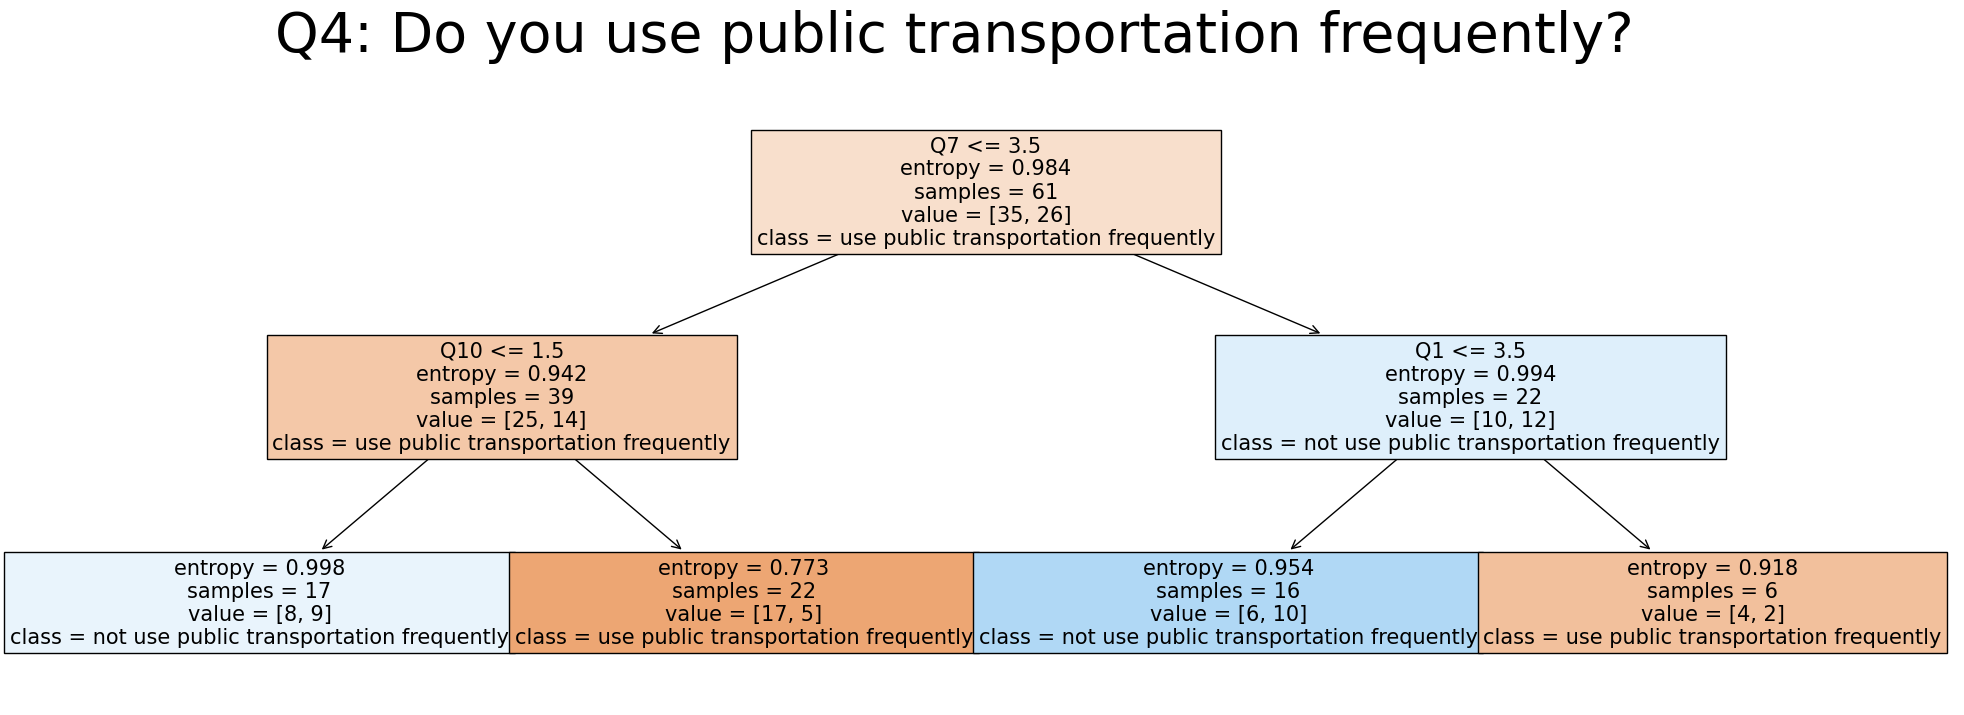

Processing aim: Q4: Do you use public transportation frequently?


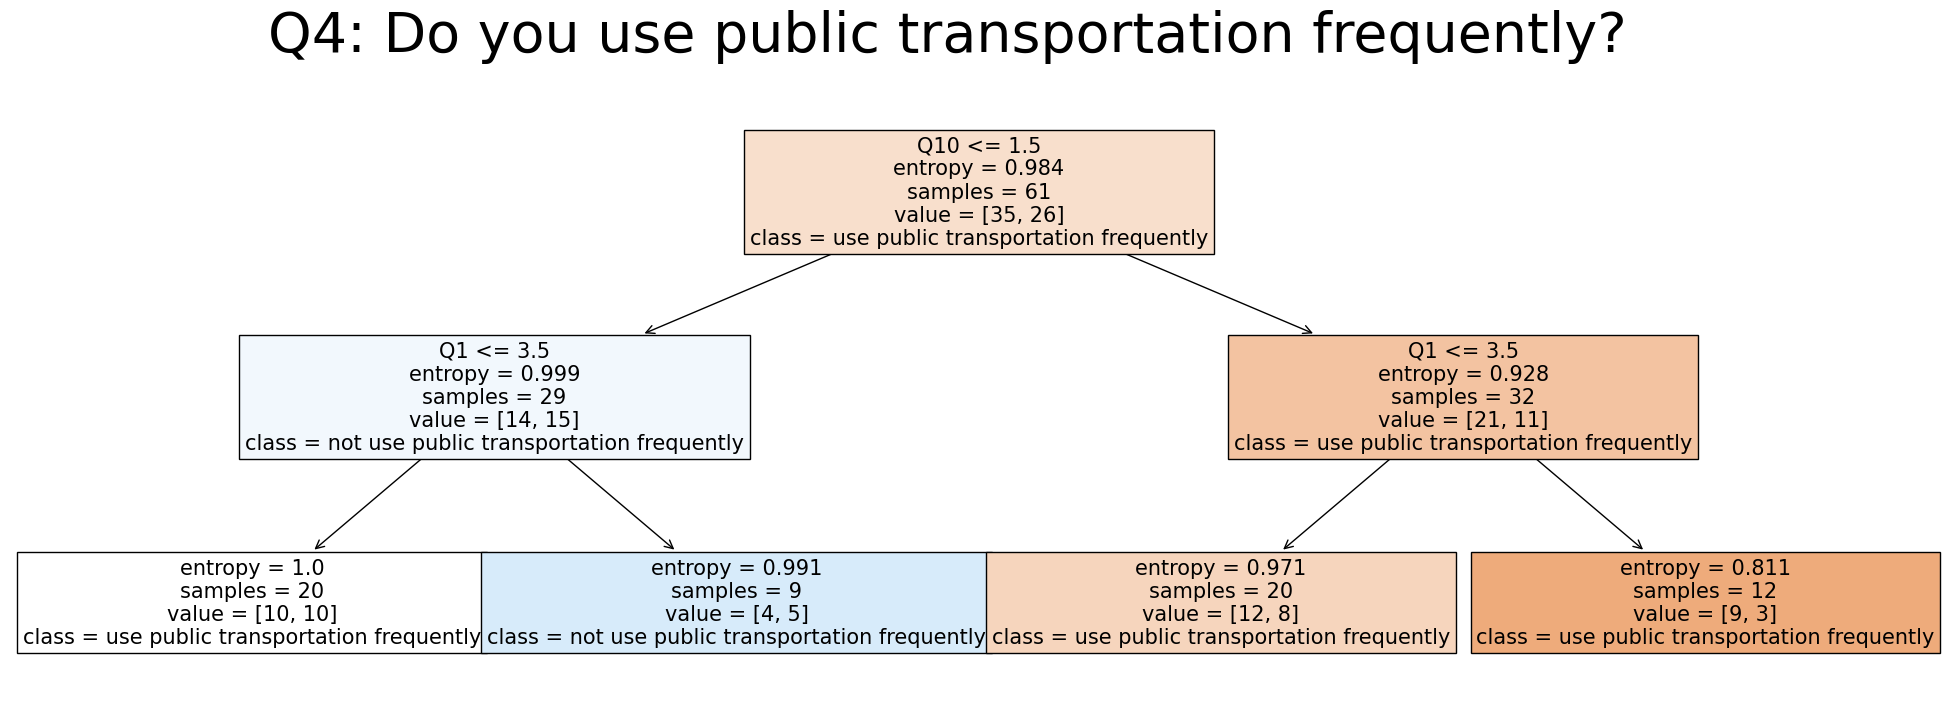

,Attribute,Aim,Aim_description,Aim_resp,Total_count,Aim_%_True,Condition1,Condition1_description,Condition1_resp,Condition1_count,Condition1_Aim_%,Condition2,Condition2_description,Condition2_resp,Condition2_count,Condition2_Aim_%,final_entropy
0,People,Q4,Do you use public transportation frequently?,use public transportation frequently,61,0.57377,Q7,Do you consider pulic transport to be affordable?,if they consider public transport to be not ex...,39,0.641026,Q10,Do your peers expect you to use public transpo...,if they feel their peers do not expect them to...,22,0.772727,0.773227
1,People,Q4,Do you use public transportation frequently?,use public transportation frequently,61,0.57377,Q10,Do your peers expect you to use public transpo...,if they feel their peers do not expect them to...,32,0.656250,Q1,What is your age?,if they are over 50,12,0.750000,0.811278


In [19]:
#You can change these values:
entropy_threshold = 0.85 #How much entropy can the node have (yes aim:no aim) to be considered?
sample_threshold = 0.1 #What proportion of the original sample size to be considered?

# Select which aim and condition questions you would like to visualize in the Parallel set diagram
aim = "Q4"
conditions = ["Q1", "Q7", "Q10"]

statement_questions =  select_statements(aim, conditions, adjusted_responses, statement_questions, "People", entropy_threshold, sample_threshold, 0)

display(statement_questions)

# Save the DataFrame to a CSV file
statement_questions.to_csv("Mocksurvey_tree_selected_statements.csv", index=False)

In [20]:
for row in statement_questions.index:
    print(statement_questions.loc[row, "Attribute"])
    print(statement_questions.loc[row, "Aim_resp"])
    print(statement_questions.loc[row, "Condition1_resp"])
    print("and", statement_questions.loc[row, "Condition2_resp"],"\n")

People
use public transportation frequently
if they consider public transport to be not expensive
and if they feel their peers do not expect them to use public transportation 

People
use public transportation frequently
if they feel their peers do not expect them to use public transportation
and if they are over 50 



Visualise the Institutional Grammar statements and values

In [21]:
import textwrap
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

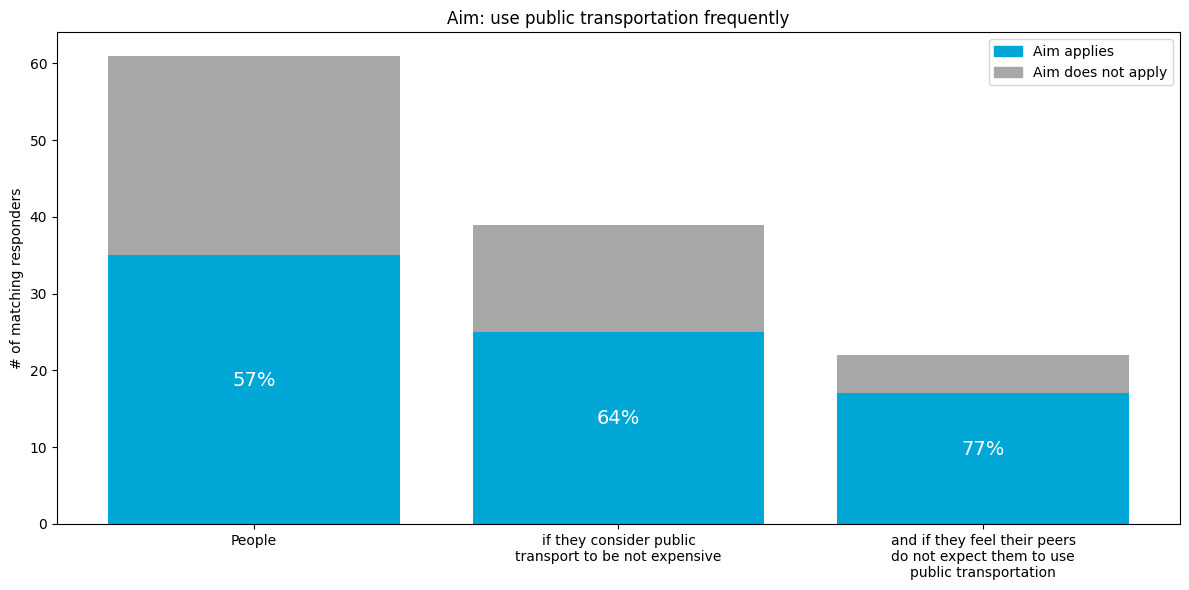

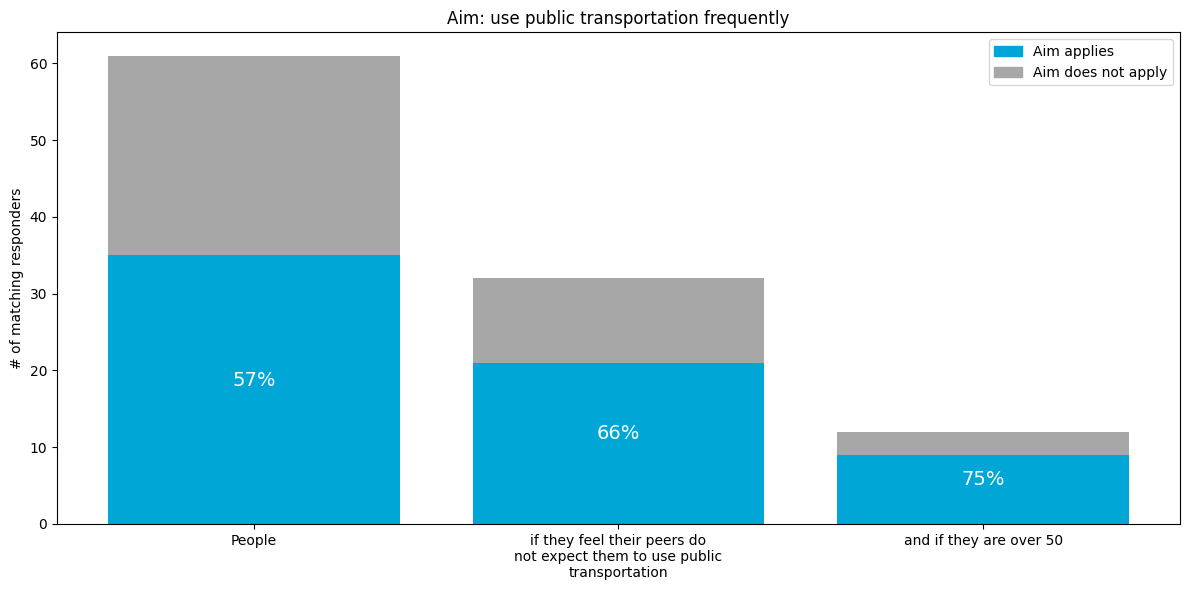

In [22]:
rows = len(statement_questions)

for i, row in statement_questions.iterrows():
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Adding legend
    blue_patch = mpatches.Patch(color='#00a6d6', label='Aim applies')
    grey_patch = mpatches.Patch(color='#a7a7a7', label='Aim does not apply')

    # Bar1: Total_count
    bar1 = ax.bar(row['Attribute'], row['Total_count'], color='#a7a7a7')
    ax.bar(row['Attribute'], row['Total_count'] * row['Aim_%_True'], color='#00a6d6')
    ax.text(row['Attribute'], row['Total_count'] * row['Aim_%_True']/2, f"{row['Aim_%_True']*100:.0f}%", 
            color='white', ha='center', va='bottom', fontsize=14)

    # Bar2: Condition1_count
    bar2 = ax.bar(row['Condition1'], row['Condition1_count'], color='#a7a7a7')
    ax.bar(row['Condition1'], row['Condition1_count'] * row['Condition1_Aim_%'], color='#00a6d6')
    ax.text(row['Condition1'], row['Condition1_count'] * row['Condition1_Aim_%']/2, f"{row['Condition1_Aim_%']*100:.0f}%", 
            color='white', ha='center', va='bottom', fontsize=14)

    # Bar3: Condition2_count
    bar3 = ax.bar(row['Condition2'], row['Condition2_count'], color='#a7a7a7')
    ax.bar(row['Condition2'], row['Condition2_count'] * row['Condition2_Aim_%'], color='#00a6d6')
    ax.text(row['Condition2'], row['Condition2_count'] * row['Condition2_Aim_%']/2, f"{row['Condition2_Aim_%']*100:.0f}%", 
            color='white', ha='center', va='bottom', fontsize=14)

    # Title of each plot
    ax.set_title("Aim: "+row['Aim_resp'])

    # Set ticks and labels
    ax.set_ylabel("# of matching responders")
    ax.set_xticks([0, 1, 2])
    wrapped_labels = [textwrap.fill(label, 30) for label in [row['Attribute'], row['Condition1_resp'], "and "+row['Condition2_resp']]]
    ax.set_xticklabels(wrapped_labels, rotation=0)

    ax.legend(handles=[blue_patch, grey_patch], loc='upper right')

    plt.tight_layout()
    plt.show()

If you prefer a Stack plot: 

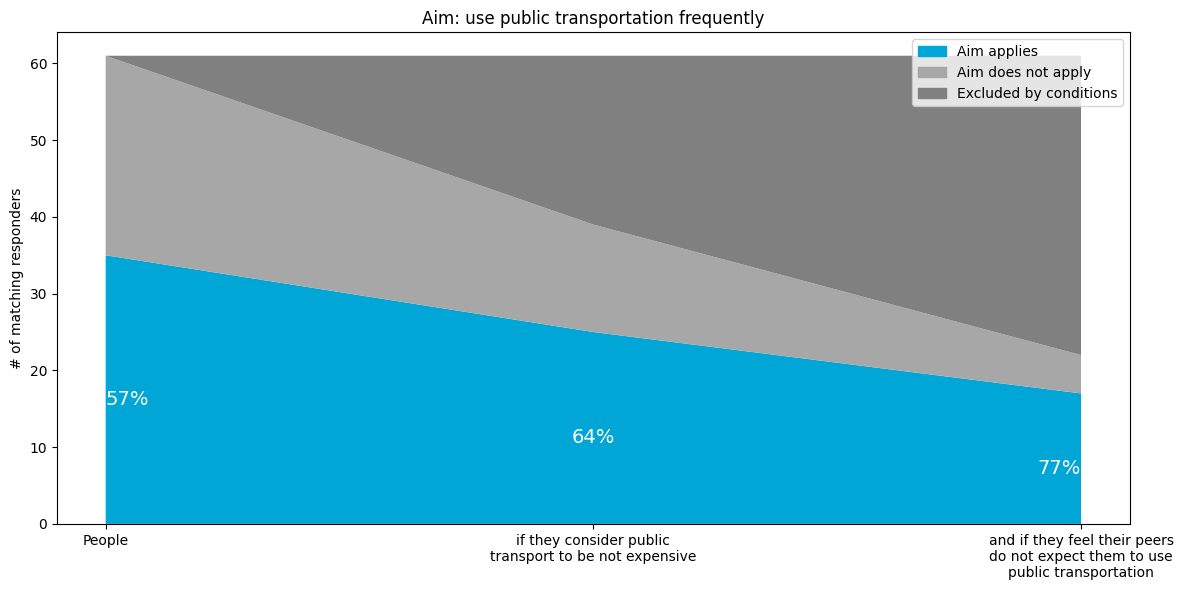

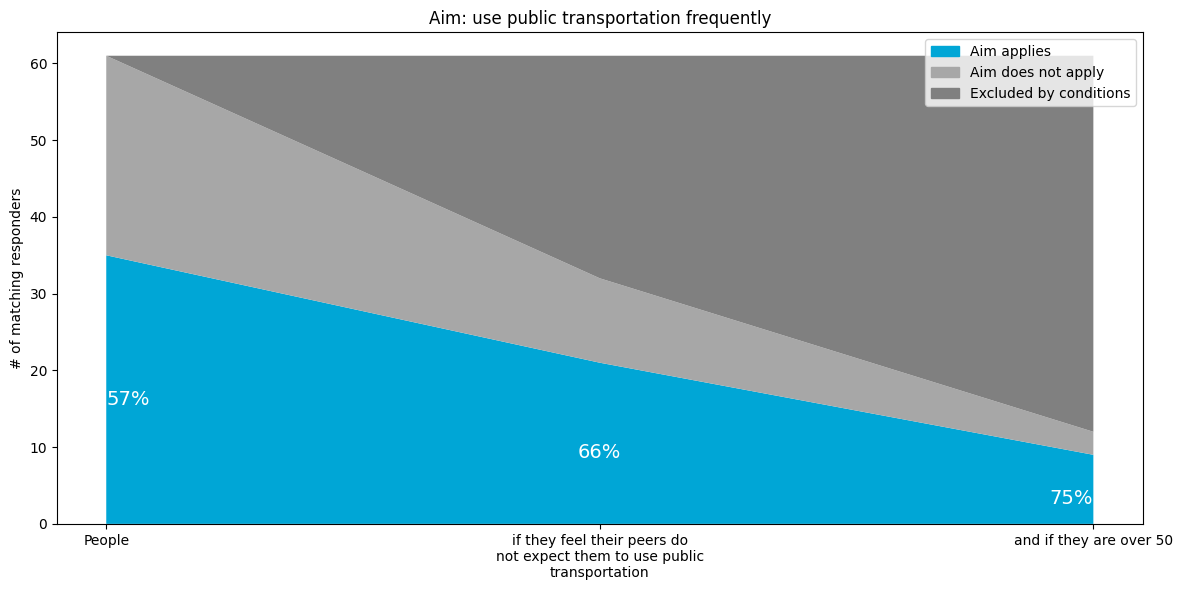

In [23]:
rows = len(statement_questions)

for i, row in statement_questions.iterrows():
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Adding legend
    blue_patch = mpatches.Patch(color='#00a6d6', label='Aim applies')
    grey_patch = mpatches.Patch(color='#a7a7a7', label='Aim does not apply')
    exc_patch = mpatches.Patch(color='grey', label='Excluded by conditions')

    # Stackplot data
    xlabels = [row['Attribute'], row['Condition1'], row['Condition2']]
    total_counts = [row['Total_count'], row['Condition1_count'], row['Condition2_count']]
    aim_true_counts = [row['Total_count'] * row['Aim_%_True'], 
                       row['Condition1_count'] * row['Condition1_Aim_%'], 
                       row['Condition2_count'] * row['Condition2_Aim_%']]
    aim_false_counts = [total - true for total, true in zip(total_counts, aim_true_counts)]
    
    #create counts of the responses that have been excluded for not meeting the condition value
    excluded_counts = [row['Total_count'] - not_excluded for not_excluded in total_counts]

    # Plotting stackplot
    ax.stackplot(xlabels, aim_true_counts, aim_false_counts, excluded_counts, labels=['Aim does not apply', 'Aim applies', 'Excluded'], colors=['#00a6d6', '#a7a7a7', "grey"])

    i_ha = 0
    ha = ['left', 'center', 'right']
    # Adding percentages as text
    for attr, total, aim_true in zip(xlabels, total_counts, aim_true_counts):
        ax.text(attr, aim_true/2, f"{aim_true/total*100:.0f}%", color='white', ha=ha[i_ha], va='top', fontsize=14)
        i_ha+=1


    # Title of each plot
    ax.set_title("Aim: "+row['Aim_resp'])

    # Set ticks and labels
    ax.set_ylabel("# of matching responders")
    ax.set_xticks([0, 1, 2])
    wrapped_labels = [textwrap.fill(label, 30) for label in [row['Attribute'], row['Condition1_resp'], "and "+row['Condition2_resp']]]
    ax.set_xticklabels(wrapped_labels, rotation=0)

    ax.legend(handles=[blue_patch, grey_patch, exc_patch], loc='upper right')

    plt.tight_layout()
    plt.show()

    # flows: 
    # a

Sankey plot:

In [24]:
row

Attribute                                                            People
Aim                                                                      Q4
Aim_description                Do you use public transportation frequently?
Aim_resp                               use public transportation frequently
Total_count                                                              61
Aim_%_True                                                          0.57377
Condition1                                                              Q10
Condition1_description    Do your peers expect you to use public transpo...
Condition1_resp           if they feel their peers do not expect them to...
Condition1_count                                                         32
Condition1_Aim_%                                                    0.65625
Condition2                                                               Q1
Condition2_description                                    What is your age?
Condition2_r

In [25]:
import plotly.graph_objects as go
import pandas as pd
import textwrap

for i, row in statement_questions.iterrows():
    # Calculate values
    total_count = row['Total_count']
    condition1_count = row['Condition1_count']
    condition2_count = row['Condition2_count']
    
    aim_true_total = total_count * row['Aim_%_True']
    aim_false_total = total_count - aim_true_total
    
    aim_true_cond1 = condition1_count * row['Condition1_Aim_%']
    aim_false_cond1 = condition1_count - aim_true_cond1
    excluded_true_cond1 = aim_true_total - aim_true_cond1
    excluded_false_cond1 = aim_false_total - aim_false_cond1
    
    aim_true_cond2 = condition2_count * row['Condition2_Aim_%']
    aim_false_cond2 = condition2_count - aim_true_cond2
    excluded_true_cond2 = aim_true_cond1 - aim_true_cond2
    excluded_false_cond2 = aim_false_cond1 - aim_false_cond2

    # Define node labels with line breaks
    labels = [
        textwrap.fill(row['Attribute'], width=10), 
        textwrap.fill(row['Condition1_resp'], width=10),
        textwrap.fill(row['Condition1_resp'], width=10),
        textwrap.fill(row['Condition2_resp'], width=10),
        textwrap.fill(row['Condition2_resp'], width=10),
        'Aim True and<br>meets conditions', 
        'Aim False and<br>meets conditions', 
        'Does not<br>meet conditions'
    ]

    # Define links
    source = [0, 0, 1, 2, 1, 2, 3, 4, 3, 4]
    target = [1, 2, 3, 4, 7, 7, 5, 6, 7, 7]
    value = [
        aim_true_total, aim_false_total, 
        aim_true_cond1, aim_false_cond1, excluded_true_cond1, excluded_false_cond1, 
        aim_true_cond2, aim_false_cond2, excluded_true_cond2, excluded_false_cond2,
    ]

    # Calculate percentages
    percentages = [
        aim_true_total / total_count * 100,
        aim_false_total / total_count * 100,
        aim_true_cond1 / condition1_count * 100,
        aim_false_cond1 / condition1_count * 100,
        excluded_true_cond1 / aim_true_total * 100,
        excluded_false_cond1 / aim_false_total * 100,
        aim_true_cond2 / condition2_count * 100,
        aim_false_cond2 / condition2_count * 100,
        excluded_true_cond2 / aim_true_cond1 * 100,
        excluded_false_cond2 / aim_false_cond1 * 100
    ]

    # Color scheme
    color_aim_true = '#00a6d6'
    color_aim_false = '#a7a7a7'
    color_excluded = 'grey'

    link_colors = [color_aim_true, color_aim_false,
                   color_aim_true, color_aim_false, color_excluded, color_excluded, 
                   color_aim_true, color_aim_false, color_excluded, color_excluded]

    # Create Sankey diagram
    fig = go.Figure(data=[go.Sankey(
        arrangement = "snap",
        node = dict(
        pad = 50,
        thickness = 20,
        line = dict(width = 0.5),
        label = labels,
        color = "blue",
        ),
        link = dict(
        source = source,
        target = target,
        value = value,
        color = link_colors
    ))])

    # Add invisible scatter traces for legend
    fig.add_trace(go.Scatter(
        x=[None], y=[None], mode='markers',
        marker=dict(size=15, color='#00a6d6'),
        name='Aim applies',
        showlegend=True
    ))

    fig.add_trace(go.Scatter(
        x=[None], y=[None], mode='markers',
        marker=dict(size=15, color='#a7a7a7'),
        name='Aim does not apply',
        showlegend=True
    ))

    fig.add_trace(go.Scatter(
        x=[None], y=[None], mode='markers',
        marker=dict(size=15, color='grey'),
        name='Excluded by conditions',
        showlegend=True,
    ))

    # Update layout
    fig.update_layout(
        title_text=f"""Sankey plot representation of an IG statement extracted by decision tree algorithm:<br>{row['Aim_resp']}""",
        font_size=12,
        height=600,
        width=1500,
        legend=dict(
            orientation="h",
            yanchor="bottom",
            y=1.02,
            xanchor="right",
            x=1
        ),    
        # Hide axes
        xaxis=dict(visible=False),
        yaxis=dict(visible=False),
        # Remove plot background
        plot_bgcolor='rgba(0,0,0,0)'
    )

    fig.show()